### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?

Answers:

1. If this model where optimized toward precision, we'd be minimizing the number of false positives: users who are targeted in the campaign but are not retained.
2. If this model where optimized toward recall, we'd be minimizing the number of false negatives, or making sure that users who could have retained, did.
3. The model would be most optimized, at this point, towards recall, as there's the largest business gain.

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

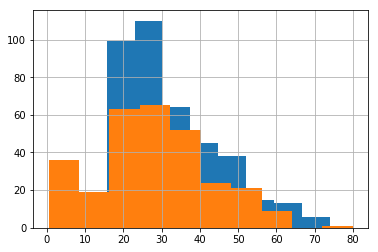

In [162]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

titanic = pd.read_csv('../../assets/dataset/titanic.csv')
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

titanic.groupby('Survived').Age.hist()

In [163]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

In [164]:
from sklearn import grid_search, cross_validation

feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
cv=cross_validation.KFold(n=len(titanic), n_folds=10)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cv,
    scoring='roc_auc'
)


gs.fit(feature_set, titanic.Survived)
print(gs.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [165]:
gs.grid_scores_

[mean: 0.83905, std: 0.02899, params: {'C': 100000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 10000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.83900, std: 0.02900, params: {'C': 1000, 'class_weight': None},
 mean: 0.83905, std: 0.02934, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.83894, std: 0.02869, params: {'C': 100, 'class_weight': None},
 mean: 0.83910, std: 0.02936, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.83909, std: 0.02895, params: {'C': 10, 'class_weight': None},
 mean: 0.83906, std: 0.02946, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.84019, std: 0.02962, params: {'C': 1, 'class_weight': None},
 mean: 0.83890, std: 0.02989, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.83737, std: 0.03051, params: {'C': 0.1, 'class_weight': None},
 mean: 0.83560, std: 0

In [166]:
titanic['prob'] = gs.predict_proba(feature_set).T[1]
titanic['predict'] = gs.predict(feature_set)

In [168]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,is_male,had_parents,had_siblings,prob,predict
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,1,0.103675,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,1,0.888588,1
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,0.579683,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0,0,0,0,1,0.895207,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1,1,0,0,0.079267,0
6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q,0,0,1,1,0,0,0.103350,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,0,0,1,0,0,0.304636,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,0,1,1,1,1,0.177186,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,0,0,1,0,1,0,0.550667,1


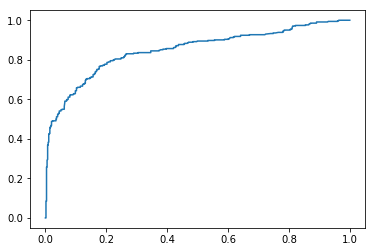

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

mod = gs.best_estimator_

actuals = mod.predict(feature_set) 
probas = mod.predict_proba(feature_set)
plt.plot(roc_curve(titanic[['Survived']], probas[:,1])[0], roc_curve(titanic[['Survived']], probas[:,1])[1])

In [173]:
roc_curve(titanic[['Survived']], probas[:,1])[2]

array([ 1.96678589,  0.96678589,  0.93713765,  0.93709548,  0.93187994,
        0.92974511,  0.85328649,  0.84991294,  0.83210316,  0.82704813,
        0.80853934,  0.80655322,  0.7908234 ,  0.79056832,  0.78426318,
        0.78281624,  0.78134987,  0.7806062 ,  0.76691388,  0.76016847,
        0.75083173,  0.74745079,  0.74312912,  0.7424744 ,  0.73024692,
        0.72502348,  0.72096336,  0.72024828,  0.71968661,  0.7118932 ,
        0.71008998,  0.69501819,  0.69219637,  0.6825861 ,  0.66885569,
        0.66607613,  0.66357171,  0.66130646,  0.66011733,  0.65493668,
        0.64548133,  0.64459275,  0.64447263,  0.64415168,  0.64342028,
        0.64086893,  0.63127693,  0.62668858,  0.62436028,  0.62069423,
        0.62065002,  0.61479677,  0.61475786,  0.6146819 ,  0.61464111,
        0.61462443,  0.614617  ,  0.61440082,  0.6143909 ,  0.61431184,
        0.6138826 ,  0.61352299,  0.61260425,  0.61259311,  0.61237026,
        0.6045078 ,  0.59973587,  0.5967039 ,  0.59660542,  0.58

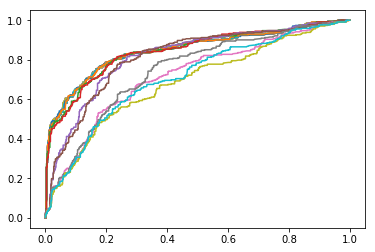

In [23]:
for c in [10**-i for i in range(-5, 5)]:
    for class_weight in [None, 'balanced']:
        gs_ind = grid_search.GridSearchCV(
        estimator=LogisticRegression(),
        cv=cv,
        param_grid={'C': [c], 'class_weight': [class_weight]},
        scoring='roc_auc')
        
        gs_ind.fit(feature_set, titanic.Survived)
        actuals = gs_ind.predict(feature_set) 
        probas = gs_ind.predict_proba(feature_set)
        plt.plot(roc_curve(titanic[['Survived']], probas[:,1])[0], roc_curve(titanic[['Survived']], probas[:,1])[1])

In [22]:
roc_curve(titanic[['Survived']], probas[:,1])

(array([ 0.        ,  0.        ,  0.00182149,  0.00182149,  0.00364299,
         0.00364299,  0.00546448,  0.00546448,  0.00728597,  0.00728597,
         0.00910747,  0.00910747,  0.01092896,  0.01092896,  0.01275046,
         0.01275046,  0.01457195,  0.01457195,  0.01639344,  0.01639344,
         0.01821494,  0.01821494,  0.02003643,  0.02003643,  0.02185792,
         0.02185792,  0.0273224 ,  0.0273224 ,  0.0291439 ,  0.0291439 ,
         0.03278689,  0.03278689,  0.03642987,  0.03642987,  0.03825137,
         0.03825137,  0.04371585,  0.04371585,  0.04553734,  0.04553734,
         0.04735883,  0.04735883,  0.05464481,  0.05464481,  0.0564663 ,
         0.0564663 ,  0.0582878 ,  0.0582878 ,  0.06010929,  0.06010929,
         0.06739526,  0.06739526,  0.06921676,  0.06921676,  0.07103825,
         0.07103825,  0.07832423,  0.07832423,  0.08014572,  0.08196721,
         0.08196721,  0.08378871,  0.08378871,  0.08743169,  0.08743169,
         0.08925319,  0.08925319,  0.09107468,  0.0

In [174]:
roc_auc_score(titanic['Survived'], mod.predict_proba(feature_set)[:,1])

0.84899445030304976

In [175]:
roc_auc_score(titanic['Survived'], mod.predict(feature_set))

0.78403317035758791

In [181]:
roc_curve(titanic['Survived'], mod.predict_proba(feature_set)[:,1])

(array([ 0.        ,  0.00182149,  0.00182149,  0.00182149,  0.00182149,
         0.00364299,  0.00364299,  0.00546448,  0.00546448,  0.00728597,
         0.00728597,  0.00728597,  0.00728597,  0.00910747,  0.00910747,
         0.01092896,  0.01092896,  0.01092896,  0.01092896,  0.01092896,
         0.01092896,  0.01275046,  0.01275046,  0.01457195,  0.01457195,
         0.01457195,  0.01639344,  0.01639344,  0.01821494,  0.01821494,
         0.02003643,  0.02003643,  0.02367942,  0.02367942,  0.03460838,
         0.03460838,  0.03642987,  0.03642987,  0.03642987,  0.04007286,
         0.04007286,  0.04189435,  0.04189435,  0.04371585,  0.04371585,
         0.04553734,  0.04553734,  0.05100182,  0.05100182,  0.05464481,
         0.05464481,  0.0582878 ,  0.06193078,  0.06193078,  0.06193078,
         0.06375228,  0.06375228,  0.06921676,  0.06921676,  0.07103825,
         0.07103825,  0.07468124,  0.07468124,  0.07468124,  0.07468124,
         0.08014572,  0.08014572,  0.08196721,  0.0

In [26]:
import numpy as np
score = []
for train, test in cv:
    score.append(roc_auc_score(titanic.Survived.iloc[test], mod.predict_proba(feature_set.iloc[test])[:,1]))
print(np.mean(score))

0.845738965544


### Visualizing models over variables

In [194]:
df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [195]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [196]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [197]:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']

In [198]:
df.shape

(458311, 37)

In [199]:
features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']

In [200]:
features += ['CRS_DEP_TIME']

In [201]:
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]
df['class'] = model.predict(df[features[1:]])

In [202]:
features[0]

'dow_1'

In [203]:
df[df[features[0]] == 1]

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,carrier_WN,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability,class
62477,5,1,2015-01-05,AA,19805,AA,12478,1247802,31703,12892,...,0,1,0,0,0,0,0,0,0.192348,0.0
62478,5,1,2015-01-05,AA,19805,AA,12892,1289203,32575,12478,...,0,1,0,0,0,0,0,0,0.192348,0.0
62479,5,1,2015-01-05,AA,19805,AA,12478,1247802,31703,12892,...,0,1,0,0,0,0,0,0,0.231630,0.0
62480,5,1,2015-01-05,AA,19805,AA,12892,1289203,32575,12478,...,0,1,0,0,0,0,0,0,0.230362,0.0
62481,5,1,2015-01-05,AA,19805,AA,11298,1129803,30194,12173,...,0,1,0,0,0,0,0,0,0.241301,0.0
62482,5,1,2015-01-05,AA,19805,AA,13830,1383002,33830,11298,...,0,1,0,0,0,0,0,0,0.312503,0.0
62483,5,1,2015-01-05,AA,19805,AA,11298,1129803,30194,13830,...,0,1,0,0,0,0,0,0,0.229729,0.0
62484,5,1,2015-01-05,AA,19805,AA,12173,1217302,32134,11298,...,0,1,0,0,0,0,0,0,0.303371,0.0
62485,5,1,2015-01-05,AA,19805,AA,12478,1247802,31703,12892,...,0,1,0,0,0,0,0,0,0.171125,0.0
62486,5,1,2015-01-05,AA,19805,AA,12892,1289203,32575,12478,...,0,1,0,0,0,0,0,0,0.367715,0.0


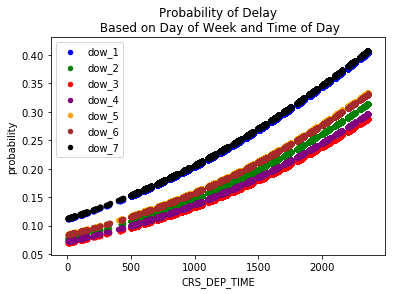

In [206]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'black']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(label=features[e] ,x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

### Other Answers: visualizing Airline performance over time; visualizing the inverse

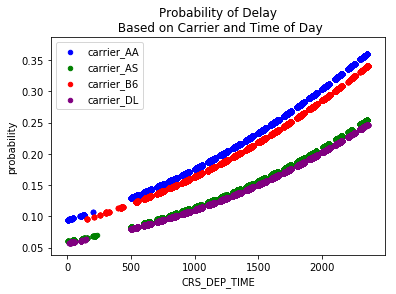

In [207]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(label=features[e], x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Delay\n Based on Carrier and Time of Day')

In [208]:
features

['carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_HA',
 'carrier_MQ',
 'carrier_NK',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'CRS_DEP_TIME']

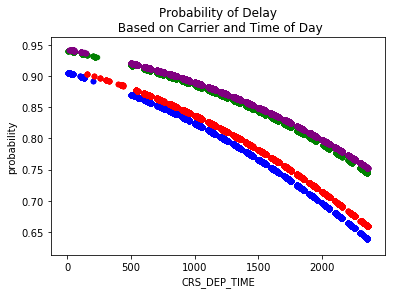

In [59]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[0]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Delay\n Based on Carrier and Time of Day')

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [60]:
from sklearn import dummy, metrics

In [210]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model1.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model1.predict_proba(df[features[1:]]).T[1]


In [211]:
df.shape

(458311, 41)

[(0, 1),
 (0, 1),

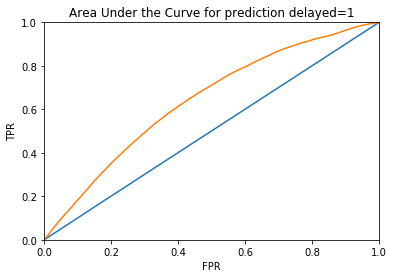

In [212]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='TPR', xlabel='FPR', xlim=(0, 1), ylim=(0, 1))

In [213]:
roc_curve(df.DEP_DEL15, df.probability_0)

(array([ 0.        ,  0.19861543,  1.        ]),
 array([ 0.        ,  0.19981754,  1.        ]),
 array([2, 1, 0]))

#### Visualizing Precision / Recall (with cleaner code)

In [221]:

model0 = dummy.DummyClassifier(strategy='uniform')
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]


model1 = lm.LogisticRegression()
model1.fit(df[features[1:]], df.DEP_DEL15)
df['probability_1'] = model1.predict_proba(df[features[1:]]).T[1]


[(0, 1),
 (0, 1),

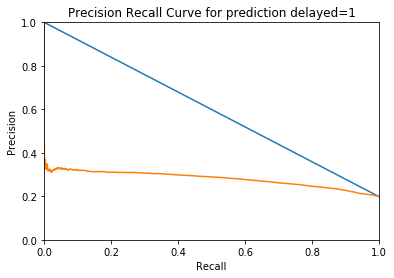

In [222]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1', ylabel='Precision', xlabel='Recall', xlim=(0, 1), ylim=(0, 1))

In [223]:
metrics.precision_recall_curve(df.DEP_DEL15, df['probability_0'])

(array([ 0.19850713,  1.        ]), array([ 1.,  0.]), array([ 0.5]))

In [224]:
#Percentage of Class 0
print(df[df.DEP_DEL15 == 0].DEP_DEL15.count() / df.DEP_DEL15.count())
#Percentage of Class 1
print(df[df.DEP_DEL15 == 1].DEP_DEL15.count() / df.DEP_DEL15.count())
#Percentage of Dummy Predicted Class 0
print(df[df.probability_0 == 0].DEP_DEL15.count() / df.DEP_DEL15.count())
#Percentage of Dummy Predicted Class 1
print(df[df.probability_0 == 1].DEP_DEL15.count() / df.DEP_DEL15.count())

0.801492872744
0.198507127256
0.0
0.0


In [226]:
df[df.probability_0 == 0].DEP_DEL15

Series([], Name: DEP_DEL15, dtype: float64)

In [227]:
df.probability_0

0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
6         0.5
7         0.5
8         0.5
9         0.5
10        0.5
11        0.5
12        0.5
13        0.5
14        0.5
15        0.5
16        0.5
17        0.5
18        0.5
19        0.5
20        0.5
21        0.5
22        0.5
23        0.5
24        0.5
26        0.5
27        0.5
28        0.5
29        0.5
30        0.5
31        0.5
         ... 
469938    0.5
469939    0.5
469940    0.5
469941    0.5
469942    0.5
469943    0.5
469944    0.5
469945    0.5
469946    0.5
469947    0.5
469948    0.5
469949    0.5
469950    0.5
469951    0.5
469952    0.5
469953    0.5
469954    0.5
469955    0.5
469956    0.5
469957    0.5
469958    0.5
469959    0.5
469960    0.5
469961    0.5
469962    0.5
469963    0.5
469964    0.5
469965    0.5
469966    0.5
469967    0.5
Name: probability_0, dtype: float64